<a href="https://colab.research.google.com/github/osamazafar980/Image-Segmentation-for-Maximal-Stable-External-Region/blob/master/Image_Segmentation_for_Maximal_Stable_External_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
import cv2 as cv
import copy

Processing Image

<function matplotlib.pyplot.show>

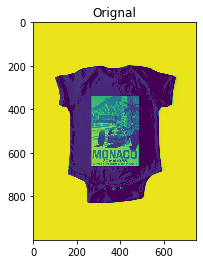

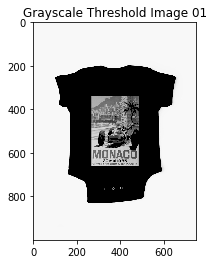

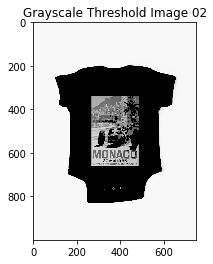

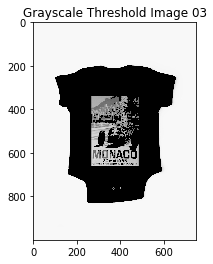

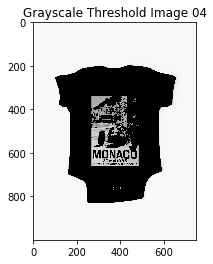

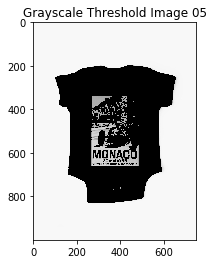

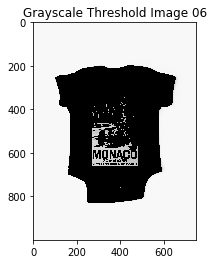

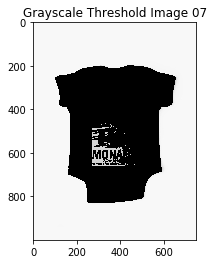

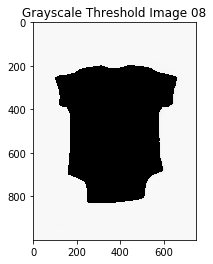

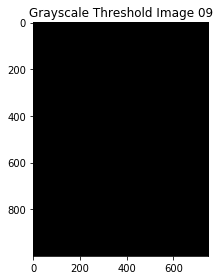

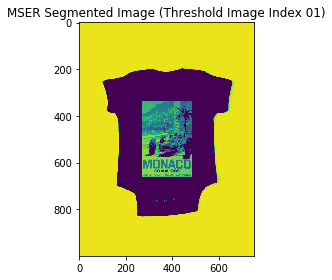

In [41]:
image = cv.imread('image.jpg')
grayscale = rgb2gray(image)
def plot(image):
  fig, axes = plt.subplots(1,1, figsize=(8, 4))
  axes.imshow(image[0])
  axes.set_title("Orignal")
  for i in range(1,len(image)):
    fig, axes = plt.subplots(1,1, figsize=(8, 4))
    axes.imshow(image[i],cmap='gray')
    value="Grayscale Threshold Image 0"+str(i)
    axes.set_title(value)
  fig.tight_layout()
  plt.show
def threshold(img,thresholdValue):
  shape=img.shape
  newImage=np.zeros(shape)
  delta=0
  for row in range(0,shape[0]):
    for col in range(0,shape[1]):
      if(img[row][col]>thresholdValue):
        newImage[row][col]=img[row][col]
      else:
        delta=delta+1
  return newImage,delta
def factoringDetas(delta):
  factors=[]
  for i in range(1,len(delta)-1):
    value=((delta[i-1]-delta[i+1])/delta[i])
    factors.append(value)
  min=0
  index=0
  for i in range(0,len(factors)):
    if(factors[i]>min):
      min=factors[i]
      index=i
  return index+1
images=[]
deltas=[]
for i in range(1,11):
  thresholdImage,delta = threshold(grayscale,i/10)
  images.append(thresholdImage)
  deltas.append(delta)
plot(images)

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
index=factoringDetas(deltas)
axes.imshow(images[index])
title="MSER Segmented Image (Threshold Image Index 0"+str(index)+")"
axes.set_title(title)
fig.tight_layout()
plt.show
  
